Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# PEC00025: Introduction to Vibration Theory


### RESPOSTA DE UM SISTEMA COM UM GRAU DE LIBERDADE A UMA EXCITAÇÃO NA BASE

_Matheus Anderson dos Santos Trindade da Costa_ (Cartão UFRGS: 00312314)  
_Porto Alegre, RS, Brazil_ 

In [210]:
# Comandos fundamentais, devem ser executados primeiro, necessários para executar os códigos estabelecidos nesse notebook.
# Os comandos a seguir importam os módulos Python necessários.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.linalg as sc

from MRPy import MRPy

# MRPy - Multivariate Random Processes with Python  ( https://orcid.org/0000-0001-5640-1020 )


## 1. Matriz de massa e flexibilidade <a name="section_1"></a> 



## 1.1. Matriz de rigidez pela matriz de flexibilidade <a name="section_11"></a> 

#### As propriedades da estrutura, como módulo de elasticidade, geometria das barras e definição da massa, foram descritas no trabalho  2.1. 

<img src="images/portico.png" alt="Isostatic truss" width="780px"/>

Utilizando o pórtico proposto no Ftool, podemos adicionar uma força unitária em cada nó dos pilares do lado esquerdo da estrutura, sendo aplicada apenas em um nó por vez. A força resultará em uma estrutura deformada. Medindo a deformação em cada nó do pilar esquerdo, para cada força aplicada, podemos montar a matriz de flexibilidade da estrutura.


In [211]:
# Matriz de flexibilidade em m/N
H1 = np.array([[0.07678, 0.08337, 0.08915, 0.09491, 0.10070, 0.10640, 0.11220, 0.11800, 0.12370, 0.12950, 0.13530], 
               [0.08337, 0.17920, 0.20300, 0.22610, 0.24920, 0.27220, 0.29530, 0.31840, 0.34150, 0.36450, 0.38760], 
               [0.08915, 0.20300, 0.32770, 0.38040, 0.43230, 0.48420, 0.53610, 0.58800, 0.63990, 0.69180, 0.74370], 
               [0.09491, 0.22610, 0.38040, 0.54540, 0.63850, 0.73070, 0.82300, 0.91530, 1.00800, 1.10000, 1.19200], 
               [0.10070, 0.24920, 0.43230, 0.63850, 0.85540, 1.00000, 1.14500, 1.28900, 1.43300, 1.57700, 1.72100],
               [0.10640, 0.27220, 0.48420, 0.73070, 1.00000, 1.28100, 1.48900, 1.69700, 1.90400, 2.11200, 2.32000],
               [0.11220, 0.29530, 0.53610, 0.82300, 1.14500, 1.48900, 1.84400, 2.12800, 2.41000, 2.69300, 2.97600],
               [0.11800, 0.31840, 0.58800, 0.91530, 1.28900, 1.69700, 2.12800, 2.57000, 2.94000, 3.30900, 3.67800],
               [0.12370, 0.34150, 0.63990, 1.00800, 1.43300, 1.90400, 2.41000, 2.94000, 3.47900, 3.94700, 4.41500],
               [0.12950, 0.36450, 0.69180, 1.10000, 1.57700, 2.11200, 2.69300, 3.30900, 3.94700, 4.59700, 5.17400],
               [0.13530, 0.38760, 0.74370, 1.19200, 1.72100, 2.32000, 2.97600, 3.67800, 4.41500, 5.17400, 5.94500]])*1e-7


A matriz de rigidez é a inversa da matriz de flexibilidade: $\mathbf{H}^{-1} = \mathbf{K}$

In [212]:
# Matriz de rigidez em N/m
K1 = np.linalg.inv(H1) 
print(K1)

[[ 2.66858421e+08 -1.37501033e+08  4.04456302e+06  1.92834220e+06
   1.09492729e+06  9.99663578e+05  5.54159795e+05 -4.52429431e+04
   7.36039772e+05 -9.34962583e+04  5.77073035e+05]
 [-1.37501033e+08  2.63441507e+08 -1.37814275e+08  3.76435445e+06
   1.30865728e+06  1.17756032e+06  6.59863031e+05  6.20875875e+05
  -2.90911947e+05  4.74209939e+05  6.89431234e+05]
 [ 4.04456302e+06 -1.37814275e+08  2.63157236e+08 -1.38711642e+08
   3.96578130e+06  1.04215749e+06  9.11593848e+05 -2.83430710e+05
   1.79716604e+06 -7.67203011e+04  6.81737129e+05]
 [ 1.92834220e+06  3.76435445e+06 -1.38711642e+08  2.63493798e+08
  -1.38445562e+08  1.57116073e+06  3.06722143e+06  2.16489712e+06
  -1.90537046e+06  3.26157284e+05  1.95275386e+06]
 [ 1.09492729e+06  1.30865728e+06  3.96578130e+06 -1.38445562e+08
   2.60319783e+08 -1.32969941e+08 -1.46482238e+06  2.42953902e+06
   2.44126567e+05  3.94605863e+05  2.38961352e+06]
 [ 9.99663578e+05  1.17756032e+06  1.04215749e+06  1.57116073e+06
  -1.32969941e+08  

### 1.2. Matriz de massa concentrada  <a name="section_12"></a> 

Assumindo que o pórtico possui uma profundidade de 10 metros, e que a massa específica aparente de um edifício é de aproximadamente 400kg/m³. Distribuindo a massa para os nós do pórtico temos:


In [213]:
# Matriz de massa concentrada em kg
M1 = np.array([[ 3.6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], 
               [ 0,  3.6,  0,  0,  0,  0,  0,  0,  0,  0,  0], 
               [ 0,  0,  3.6,  0,  0,  0,  0,  0,  0,  0,  0], 
               [ 0,  0,  0,  3.6,  0,  0,  0,  0,  0,  0,  0],  
               [ 0,  0,  0,  0,  3.6,  0,  0,  0,  0,  0,  0], 
               [ 0,  0,  0,  0,  0,  3.6,  0,  0,  0,  0,  0], 
               [ 0,  0,  0,  0,  0,  0,  3.6,  0,  0,  0,  0], 
               [ 0,  0,  0,  0,  0,  0,  0,  3.6,  0,  0,  0],  
               [ 0,  0,  0,  0,  0,  0,  0,  0,  3.6,  0,  0], 
               [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  3.6,  0],
               [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3.6]])*1e4 


## 2. Frequências e formas modais <a name="section_1"></a> 



Resolvendo o problema de autovalores temos:

In [214]:
# Usando scipy para resolve o problema de autovalores
w2, phi1 = sc.eig(K1, M1)

# Ordenando os autovalores em ordem crescente
iw   = w2.argsort()
w2  = w2[iw]
Phi1 = phi1[:,iw]

# Autovalores para frequências de vibração
wk1  = np.sqrt(np.real(w2)) 
fk1  = wk1/2/np.pi

Phit = Phi1

print (fk1)

[ 0.59223244  2.56902177  5.40047708  8.08926274 10.55671512 12.89259646
 14.83214255 16.47873244 17.70551558 18.80148093 19.32571347]


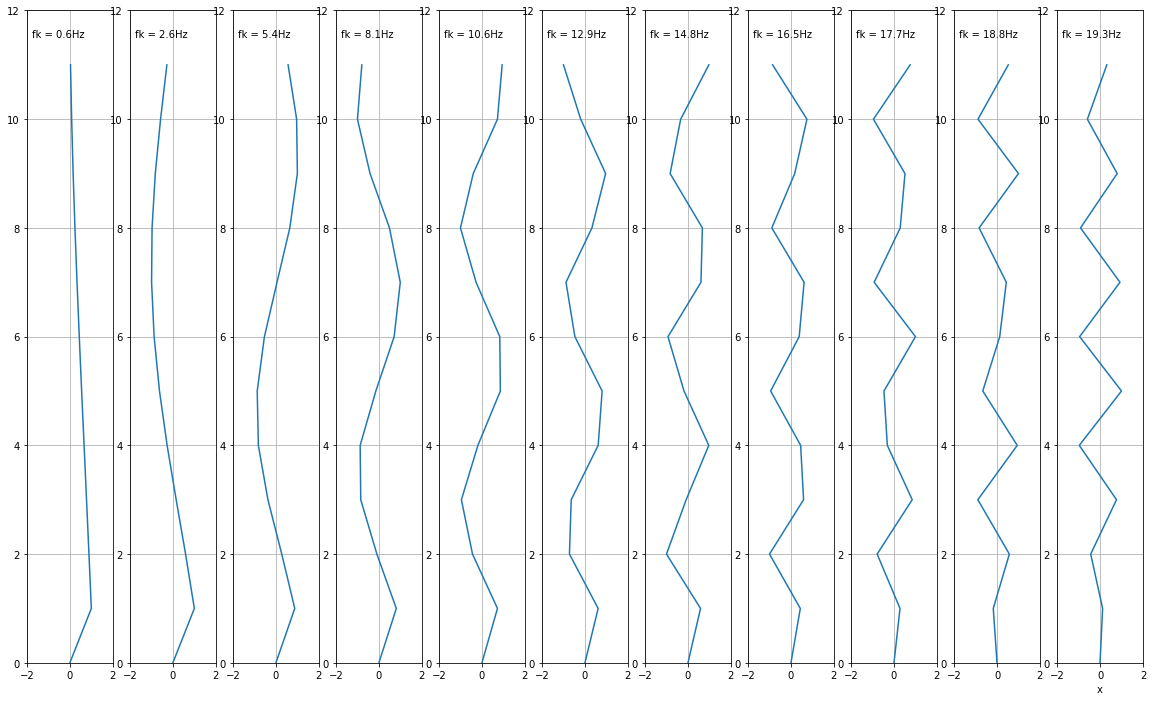

In [215]:
plt.figure(1, figsize=(20,12))
x = np.arange(12)

for k in range(11):
    pk = np.zeros(12);
    pk[1:] = Phi1[::-1,k]
    pk /= np.max(np.abs(pk))   # Ajustando escala para amplitude unitária
    
    plt.subplot(1,11,k+1)
    plt.plot(pk, x)
    
    plt.xlim(-2, 2);
    plt.ylim(0, 12);  
    plt.text(-1.75, 11.5, 'fk = {0:3.1f}Hz'.format(fk1[k]));
    plt.grid(True)

plt.xlabel('x');


## 3. Resposta a um impacto <a name="section_1"></a> 



In [216]:
F = 10000 # Força 10 kN
m = 1000 # Uma tonelada
Tn = 1/19.32571347 # menor período natural
td = Tn/4 
vo = (F*td)/m  # Velocidade inicial
print(Vo)

vo_v=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, Vo]

uo_v=np.zeros(11)

0.12936133012014484


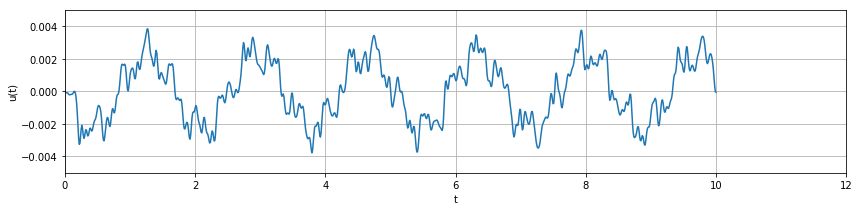

In [217]:
for k in range(10):
  
    Phit[k] = Phi1[k].transpose() # Transposta da matriz Phi

xi = np.pi/2
UMAX = np.zeros(11)

for k in range (11):
    
    Mi=np.dot(np.dot(Phit[k], M1[k,k]), Phi1[k])
    umax = (np.dot(np.dot(Phit[k], M1[k,k]),vo_v)) / (wk1[k] * np.sin(xi)* Mi)
    UMAX[k]=umax
    
t= np.linspace(0,10,1000)    
uk=np.zeros((11,1000))

for k in range (11):
    
    uk[k,:] = UMAX[k]*np.cos(-wk1[k]*t - np.pi/2)
    
u = np.dot(Phi1, uk)

plt.figure(3, figsize = (14,3))
plt.plot(t,u[10,:])
plt.xlim(0.0,12.0);plt.xlabel("t");
plt.ylim(-0.005,0.005); plt.ylabel("u(t)");
plt.grid(True)

## 4.  Amortecimento <a name="section_1"></a> 



In [218]:
zeta=np.zeros(11)
zeta[0]=0.01         
zeta[1]=0.01       

# considerado amortecimento de 1%

alfa1=2*(zeta[0]*wk1[0]-zeta[1]*wk1[1])/(wk1[0]**2-wk1[1]**2)
alfa0=2*zeta[0]*wk1[0]-alfa1*wk1[1]**2

for k in range(9):
    zeta[k+2]= alfa0/(2*wk1[k+2]) + (alfa1*wk1[k+2])/2


print(zeta)
print( )
print(alfa1)
print( )
print(alfa0)

[0.01       0.01       0.01431413 0.02374002 0.03197743 0.0396232
 0.04591025 0.05121966 0.05516323 0.05867933 0.06035921]

0.0010069101237920354

-0.18793086300746453


## Tópico off. DÚVIDA <a name="section_1"></a> 



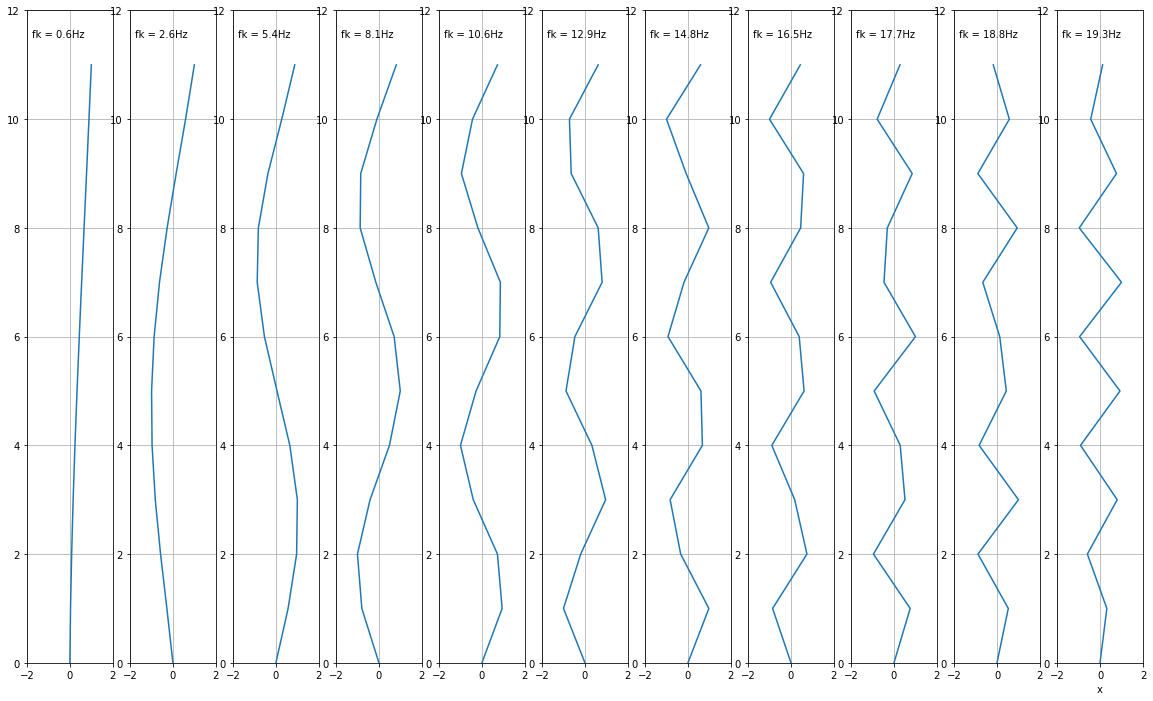

In [219]:
# Essa forma difere um pouco do código apresentado no notebook 11, mas ela parece ser mais próxima de uma forma deformada 
# da estrutura apresentada, a solução no tópico 2 parece um pouco bizarra. Talvez a solução do tópico 2 realmente
# seja correta, já que o desenho da forma modal feito no quadro durante a aula me parece também um pouco bizarro.
# Essa é minha dúvida.

plt.figure(4, figsize=(20,12))
x = np.arange(12)

for k in range(11):
    pk = np.zeros(12);
    pk[1:] = Phi1[:,k]
    pk /= np.max(np.abs(pk))   # Ajustando escala para amplitude unitária
    
    plt.subplot(1,11,k+1)
    plt.plot(pk, x)
    
    plt.xlim(-2, 2);
    plt.ylim(0, 12);  
    plt.text(-1.75, 11.5, 'fk = {0:3.1f}Hz'.format(fk1[k]));
    plt.grid(True)

plt.xlabel('x');